# init 

In [ ]:
!pip install pyneuroml
!pip install libneuroml
import math
from neuroml import NeuroMLDocument
from neuroml import Cell
from neuroml import IonChannelHH
from neuroml import GateHHRates
from neuroml import BiophysicalProperties
from neuroml import MembraneProperties
from neuroml import ChannelDensity
from neuroml import HHRate
from neuroml import SpikeThresh
from neuroml import SpecificCapacitance
from neuroml import InitMembPotential
from neuroml import IntracellularProperties
from neuroml import IncludeType
from neuroml import Resistivity
from neuroml import Morphology, Segment, Point3DWithDiam
from neuroml import Network, Population
from neuroml import PulseGenerator, ExplicitInput
import numpy as np
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation

In [61]:
# Simulation bits
sim_id = "hn8_network"
simulation = LEMSSimulation(sim_id=sim_id, duration=20000, dt=0.01, simulation_seed=123)

# Include the NeuroML model file
simulation.include_neuroml2_file("network.8.cell.nml")

# Assign target for the simulation
simulation.assign_simulation_target("net_8")

# Recording information from the simulation
simulation.create_output_file(id="display_vL", file_name=sim_id + "vL.dat")
simulation.add_column_to_output_file("display_vL", column_id="v1L", quantity="hn1L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v2L", quantity="hn2L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v3L", quantity="hn3L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v4L", quantity="hn4L_pop[0]/v")

simulation.create_output_file(id="display_vR", file_name=sim_id + "vR.dat")
simulation.add_column_to_output_file("display_vR", column_id="v1R", quantity="hn1R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v2R", quantity="hn2R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v3R", quantity="hn3R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v4R", quantity="hn4R_pop[0]/v")

# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

pyNeuroML >>> Written LEMS Simulation hn8_network to file: LEMS_hn8_network.xml
pyNeuroML >>> *** Execution of jnml has failed! ***
pyNeuroML >>> *** Command: java -Xmx2G  -Djava.awt.headless=true -jar  "/usr/local/lib/python3.7/dist-packages/pyneuroml/lib/jNeuroML-0.10.3-jar-with-dependencies.jar"  "LEMS_hn8_network.xml"  -nogui -I '' ***
pyNeuroML >>> Output: 


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Plot the data
data_array = np.loadtxt(sim_id + "vL.dat")
pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0], data_array[:, 0]], [data_array[:, 1], data_array[:, 2], data_array[:, 3], data_array[:, 4]], "Membrane potential (Left)", labels = ["v1L", "v2L", "v3L", "v4L"], show_plot_already=False, save_figure_to=sim_id + "-vL.png", xaxis="time (s)", yaxis="membrane potential (V)")

data_array = np.loadtxt(sim_id + "vR.dat")
pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0], data_array[:, 0]], [data_array[:, 1], data_array[:, 2], data_array[:, 3], data_array[:, 4]], "Membrane potential (Right)", labels=["v1R", "v2R", "v3R", "v4R"], show_plot_already=False, save_figure_to=sim_id + "-vR.png", xaxis="time (s)", yaxis="membrane potential (V)")

Cahnging synaopse


In [89]:
# Simulation bits
sim_id = "temp"
simulation = LEMSSimulation(sim_id=sim_id, duration=20000, dt=0.01, simulation_seed=123)
nml_doc = pynml.read_neuroml2_file("network.8.cell.nml")

# Modifies synaptic connections _post_pre_ 
# _3L_1L_
nml_doc.networks[0].projections[0].connection_wds[0].weight = 0
# _4L_1L_
nml_doc.networks[0].projections[1].connection_wds[0].weight = 0
# _3R_1R_
nml_doc.networks[0].projections[2].connection_wds[0].weight = 0
# _4R_1R_
nml_doc.networks[0].projections[3].connection_wds[0].weight = 0
# _3L_2L_
nml_doc.networks[0].projections[4].connection_wds[0].weight = 0
# _4L_2L_
nml_doc.networks[0].projections[5].connection_wds[0].weight = 0
# _3R_2R_
nml_doc.networks[0].projections[6].connection_wds[0].weight = 0
# _4R_2R_
nml_doc.networks[0].projections[7].connection_wds[0].weight = 0
# _1L_3L_
nml_doc.networks[0].projections[8].connection_wds[0].weight = 0
# _2L_3L_
nml_doc.networks[0].projections[9].connection_wds[0].weight = 0
# _1R_3R_
nml_doc.networks[0].projections[10].connection_wds[0].weight = 0
# _2R_3R_
nml_doc.networks[0].projections[11].connection_wds[0].weight = 0
# _1L_4L_
nml_doc.networks[0].projections[12].connection_wds[0].weight = 0
# _2L_4L_
nml_doc.networks[0].projections[13].connection_wds[0].weight = 0
# _1R_4R_
nml_doc.networks[0].projections[14].connection_wds[0].weight = 0
# _2R_4R_
nml_doc.networks[0].projections[15].connection_wds[0].weight = 0
# _3R_3L_
nml_doc.networks[0].projections[16].connection_wds[0].weight = 0
# _3L_3R_
nml_doc.networks[0].projections[17].connection_wds[0].weight = 0
# _4R_4L_
nml_doc.networks[0].projections[18].connection_wds[0].weight = 1
# _4L_4R_
nml_doc.networks[0].projections[19].connection_wds[0].weight = 1

# Include the NeuroML model file
pynml.write_neuroml2_file(nml2_doc=nml_doc, nml2_file_name="temp", validate=True)

simulation.include_neuroml2_file("temp")

# Assign target for the simulation
simulation.assign_simulation_target("net_8")

# Recording information from the simulation
simulation.create_output_file(id="display_vL", file_name=sim_id + "vL.dat")
simulation.add_column_to_output_file("display_vL", column_id="v1L", quantity="hn1L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v2L", quantity="hn2L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v3L", quantity="hn3L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v4L", quantity="hn4L_pop[0]/v")

simulation.create_output_file(id="display_vR", file_name=sim_id + "vR.dat")
simulation.add_column_to_output_file("display_vR", column_id="v1R", quantity="hn1R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v2R", quantity="hn2R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v3R", quantity="hn3R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v4R", quantity="hn4R_pop[0]/v")

# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

pyNeuroML >>> Written LEMS Simulation temp to file: LEMS_temp.xml


True

pyNeuroML >>> Generating plot: Membrane potential (Left)
pyNeuroML >>> Saved image to temp-vL.png of plot: Membrane potential (Left)
pyNeuroML >>> Generating plot: Membrane potential (Right)
pyNeuroML >>> Saved image to temp-vR.png of plot: Membrane potential (Right)


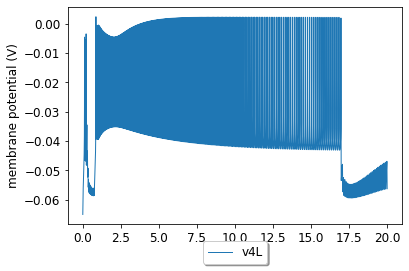

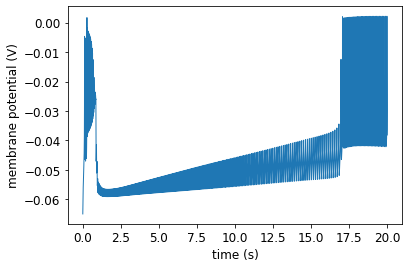

In [ ]:
# Plot the data
data_array = np.loadtxt(sim_id + "vL.dat")
pynml.generate_plot([data_array[:, 0]], [data_array[:, 4]], "Membrane potential (Left)", labels = ["v4L"], show_plot_already=False, save_figure_to=sim_id + "-vL.png", xaxis="time (s)", yaxis="membrane potential (V)")

data_array = np.loadtxt(sim_id + "vR.dat")
pynml.generate_plot([data_array[:, 0]], [data_array[:, 4]], "Membrane potential (Right)", show_plot_already=False, save_figure_to=sim_id + "-vR.png", xaxis="time (s)", yaxis="membrane potential (V)")

In [95]:
# Simulation bits
sim_id = "temp"
simulation = LEMSSimulation(sim_id=sim_id, duration=20000, dt=0.01, simulation_seed=123)
nml_doc = pynml.read_neuroml2_file("network.8.cell.nml")

# Modifies synaptic connections _post_pre_ 
# _3L_1L_
nml_doc.networks[0].projections[0].connection_wds[0].weight = 0
# _4L_1L_
nml_doc.networks[0].projections[1].connection_wds[0].weight = 0
# _3R_1R_
nml_doc.networks[0].projections[2].connection_wds[0].weight = 0
# _4R_1R_
nml_doc.networks[0].projections[3].connection_wds[0].weight = 0
# _3L_2L_
nml_doc.networks[0].projections[4].connection_wds[0].weight = 0
# _4L_2L_
nml_doc.networks[0].projections[5].connection_wds[0].weight = 0
# _3R_2R_
nml_doc.networks[0].projections[6].connection_wds[0].weight = 0
# _4R_2R_
nml_doc.networks[0].projections[7].connection_wds[0].weight = 0
# _1L_3L_
nml_doc.networks[0].projections[8].connection_wds[0].weight = 0
# _2L_3L_
nml_doc.networks[0].projections[9].connection_wds[0].weight = 0
# _1R_3R_
nml_doc.networks[0].projections[10].connection_wds[0].weight = 0
# _2R_3R_
nml_doc.networks[0].projections[11].connection_wds[0].weight = 0
# _1L_4L_
nml_doc.networks[0].projections[12].connection_wds[0].weight = 0
# _2L_4L_
nml_doc.networks[0].projections[13].connection_wds[0].weight = 0
# _1R_4R_
nml_doc.networks[0].projections[14].connection_wds[0].weight = 0
# _2R_4R_
nml_doc.networks[0].projections[15].connection_wds[0].weight = 0
# _3R_3L_
nml_doc.networks[0].projections[16].connection_wds[0].weight = 0
# _3L_3R_
nml_doc.networks[0].projections[17].connection_wds[0].weight = 0
# _4R_4L_
nml_doc.networks[0].projections[18].connection_wds[0].weight = 0
# _4L_4R_
nml_doc.networks[0].projections[19].connection_wds[0].weight = 0

# Include the NeuroML model file
pynml.write_neuroml2_file(nml2_doc=nml_doc, nml2_file_name="temp", validate=True)

simulation.include_neuroml2_file("temp")

# Assign target for the simulation
simulation.assign_simulation_target("net_8")

# Recording information from the simulation
simulation.create_output_file(id="display_vL", file_name=sim_id + "vL.dat")
simulation.add_column_to_output_file("display_vL", column_id="v1L", quantity="hn1L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v2L", quantity="hn2L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v3L", quantity="hn3L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v4L", quantity="hn4L_pop[0]/v")

simulation.create_output_file(id="display_vR", file_name=sim_id + "vR.dat")
simulation.add_column_to_output_file("display_vR", column_id="v1R", quantity="hn1R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v2R", quantity="hn2R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v3R", quantity="hn3R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v4R", quantity="hn4R_pop[0]/v")

# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

pyNeuroML >>> Written LEMS Simulation temp to file: LEMS_temp.xml


True

In [94]:
# Plot the data
data_array = np.loadtxt(sim_id + "vL.dat")
pynml.generate_plot([data_array[:, 0]], [data_array[:, 4]], "Membrane potential (Left)", labels = ["v4L"], show_plot_already=False, save_figure_to=sim_id + "-vL.png", xaxis="time (s)", yaxis="membrane potential (V)")

data_array = np.loadtxt(sim_id + "vR.dat")
pynml.generate_plot([data_array[:, 0]], [data_array[:, 4]], "Membrane potential (Right)", show_plot_already=False, save_figure_to=sim_id + "-vR.png", xaxis="time (s)", yaxis="membrane potential (V)")

KeyboardInterrupt: ignored